
## Exploratory Data Analysis and Regression Modeling
- Objective: This assignment will develop your skills in working with structured data, performing exploratory data analysis (EDA), building regression models, and interpreting results.

- Author: Xujia Qin
- Date: 24th May 2025
- Dataset: California Housing dataset (sklearn.datasets.fetch_california_housing)

### Import libraries

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 1. Data Loading and Preprocessing

In [2]:
california = fetch_california_housing(as_frame=True)
df = california.frame
print(df.head(10))

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.4

In [3]:
# Data types
print("\nData types:\n", df.dtypes)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("MedHouseVal", axis=1))
y = df["MedHouseVal"]


Data types:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


### 2. Exploratory Data Analysis (EDA)

<Figure size 1200x600 with 0 Axes>

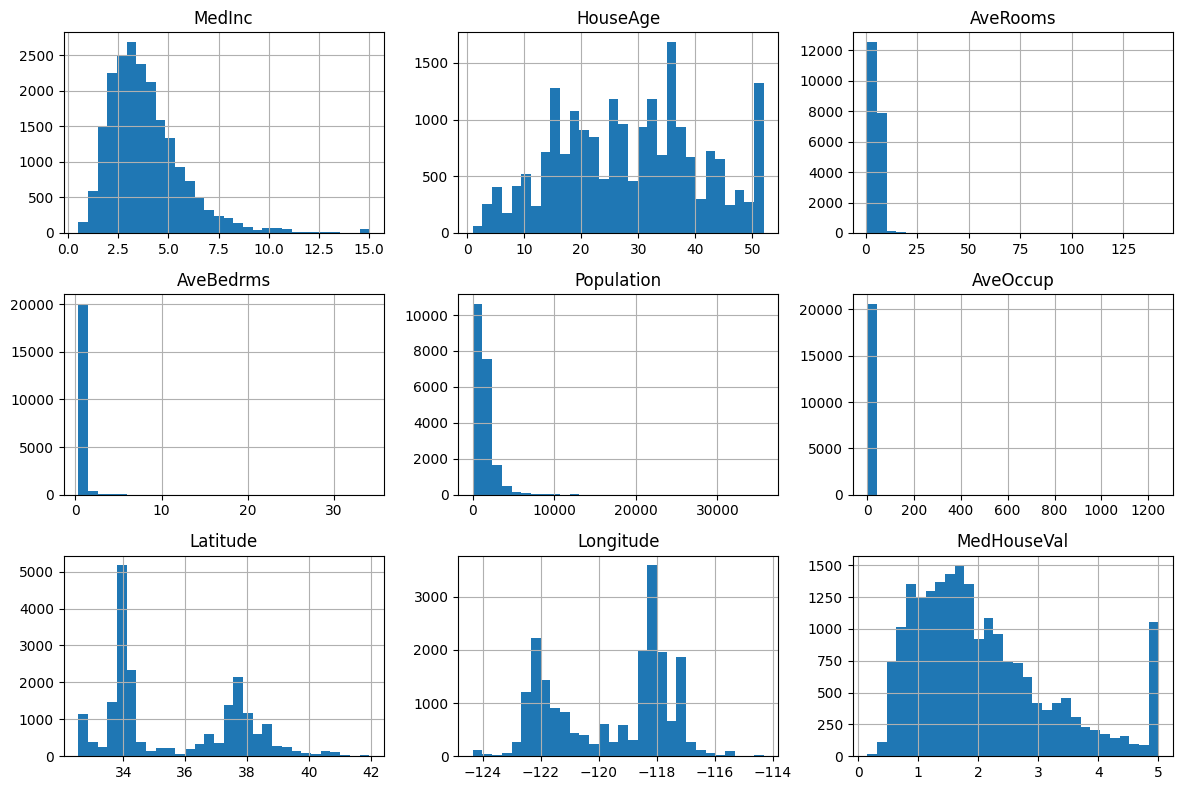

In [4]:
# Plot histograms, scatter plots, and boxplots for key features.
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


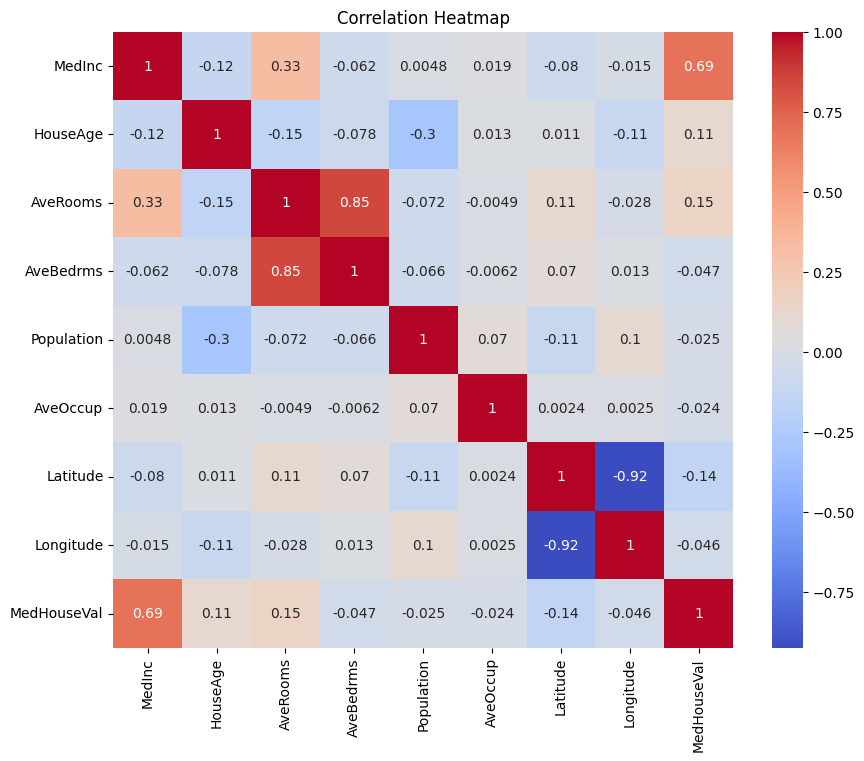

In [5]:
# Create a correlation heatmap to observe relationships among features.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

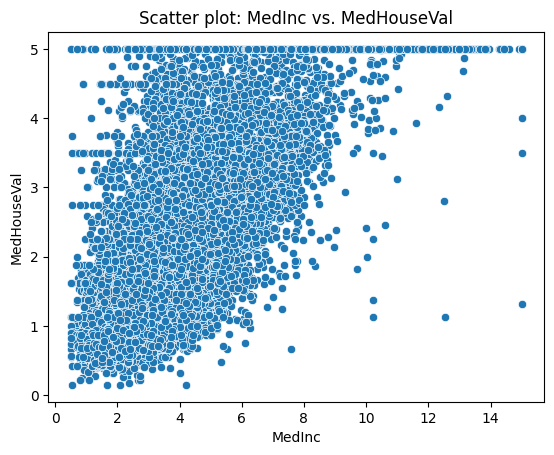

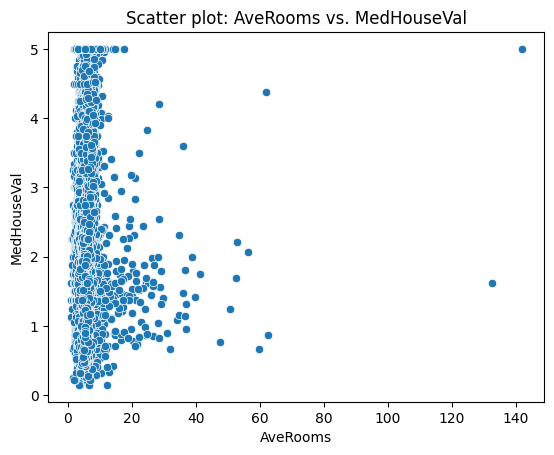

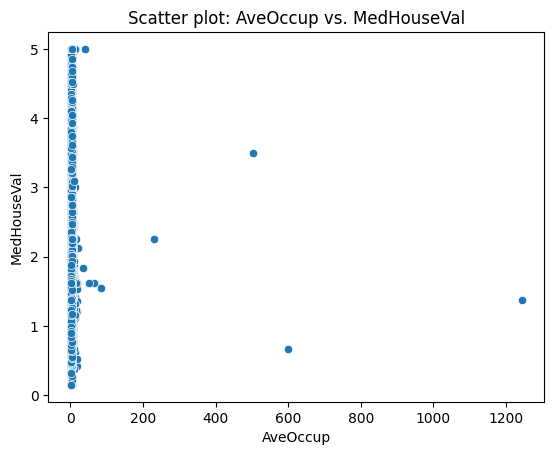

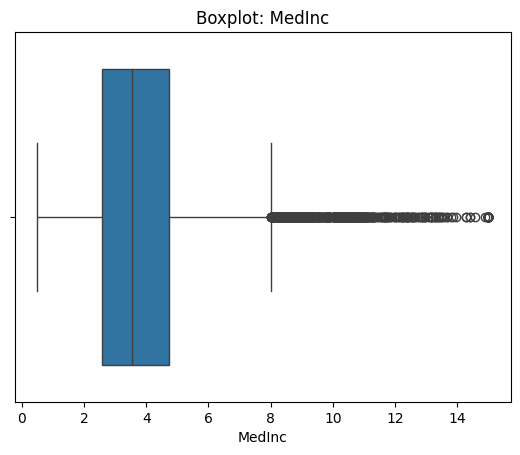

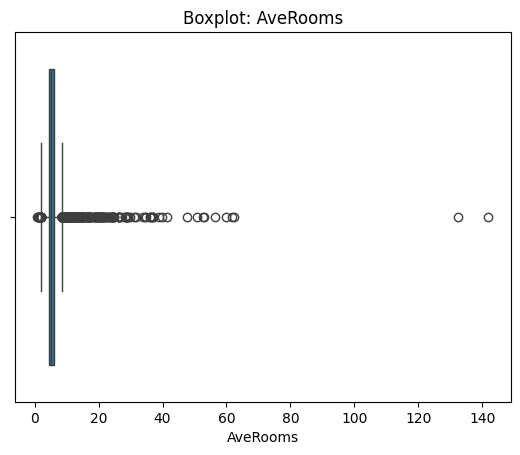

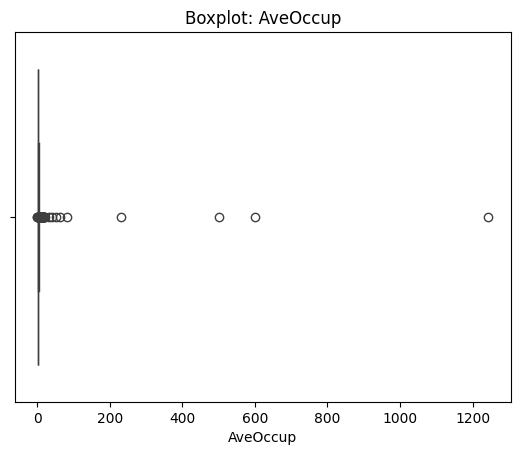

In [6]:
# Identify outliers or skewed distributions.
features = ["MedInc", "AveRooms", "AveOccup"]
for feature in features:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y="MedHouseVal")
    plt.title(f"Scatter plot: {feature} vs. MedHouseVal")
    plt.show()

# Boxplot:
# Shows the distribution and spread of each feature. The box represents the IQR (interquartile range), and points outside 1.5×IQR are outliers.
for feature in features:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot: {feature}")
    plt.show()

### 3. Model Training 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

### 4. Evaluation Metrics
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Compute the following for each model on the test set (80/20 split)

In [8]:
# evaluate models using 80/20 split
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}
    
    # Save predictions for visualization
    predictions[name] = y_pred

# Display evaluation results
results_df = pd.DataFrame(results).T
print("Evaluation Metrics (80/20 split):\n")
display(results_df)


Evaluation Metrics (80/20 split):



,MAE,MSE,RMSE,R^2
Linear Regression,0.533200,0.555892,0.745581,0.575788
Ridge Regression,0.533193,0.555851,0.745554,0.575819
Lasso Regression,0.622148,0.679552,0.824349,0.481420


### 5. Visualization – Predicted vs Actual Prices


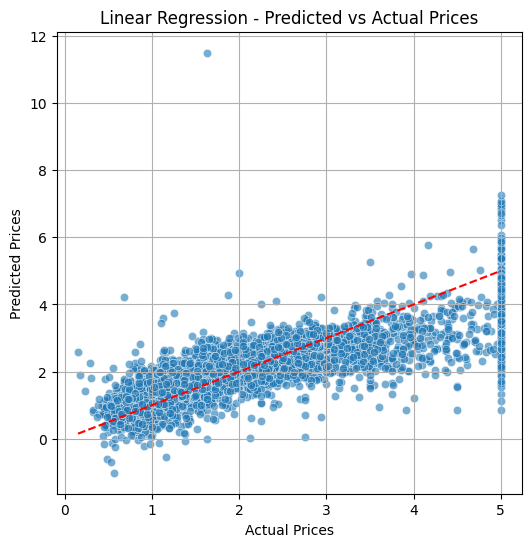

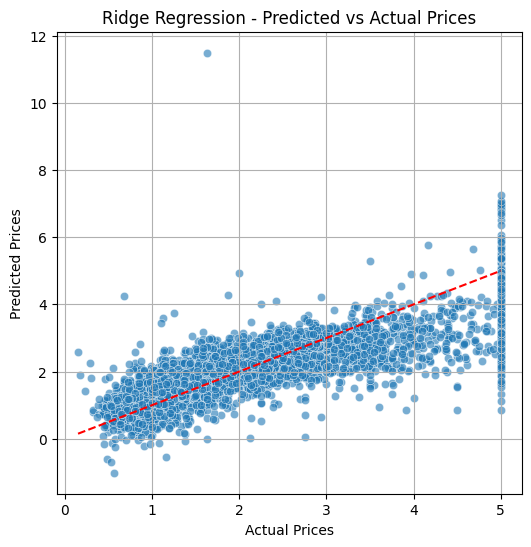

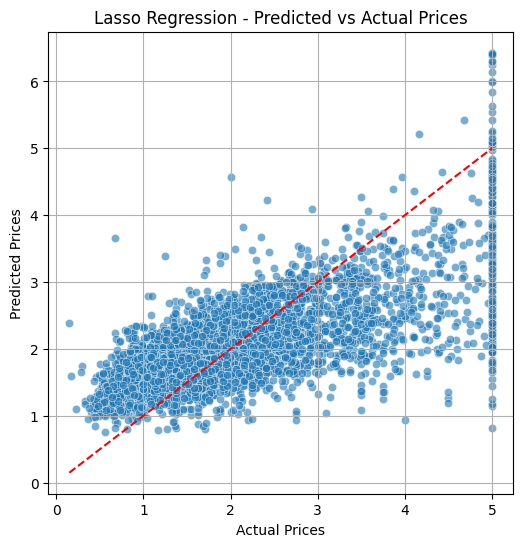

In [9]:
for name, y_pred in predictions.items():
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name} - Predicted vs Actual Prices")
    plt.grid(True)
    plt.show()

/var/folders/3c/5qwzvwy527s_wpsgqs7qf7040000gn/T/ipykernel_39175/1735923783.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="viridis")


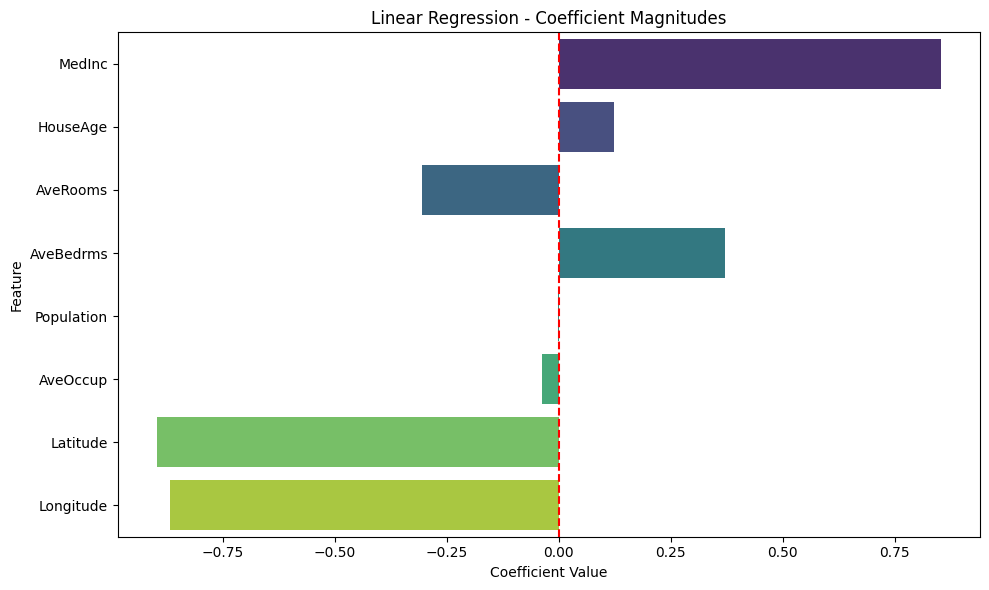

/var/folders/3c/5qwzvwy527s_wpsgqs7qf7040000gn/T/ipykernel_39175/1735923783.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="viridis")


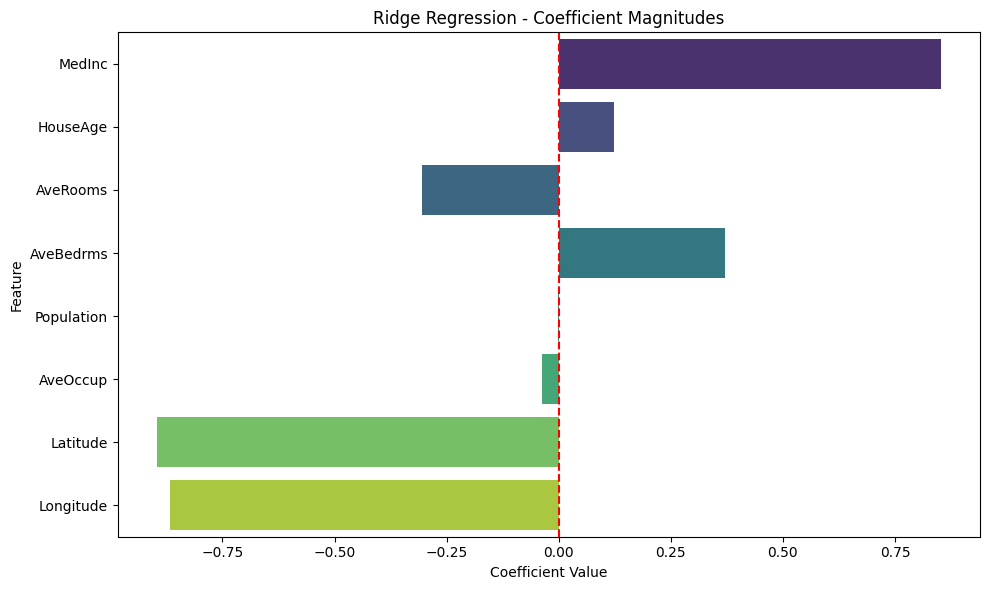

/var/folders/3c/5qwzvwy527s_wpsgqs7qf7040000gn/T/ipykernel_39175/1735923783.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="viridis")


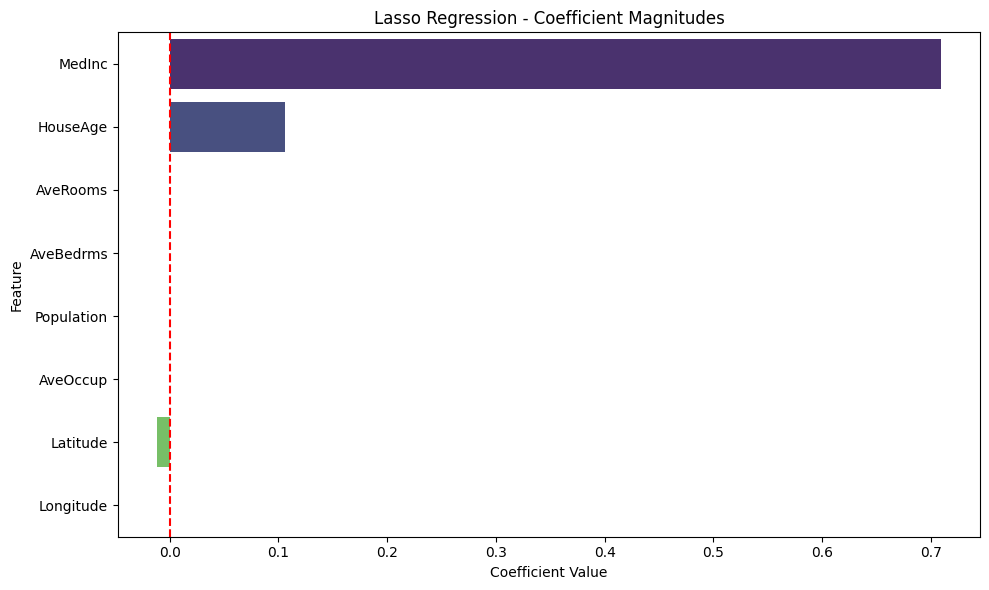

In [10]:
# Regression Coefficients Visualization
# Plot coefficients for each model
for name, model in models.items():
    if hasattr(model, 'coef_'):
        coefs = pd.Series(model.coef_, index=california.feature_names)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=coefs.values, y=coefs.index, palette="viridis")
        plt.title(f"{name} - Coefficient Magnitudes")
        plt.xlabel("Coefficient Value")
        plt.ylabel("Feature")
        plt.axvline(0, color='red', linestyle='--')  # Reference line at 0
        plt.tight_layout()
        plt.show()

### 6. Feature Selection (Keep top 5 based on correlation)

In [11]:
cor_matrix = df.corr()
top_features = cor_matrix["MedHouseVal"].abs().sort_values(ascending=False).index[1:6]
X_top = scaler.fit_transform(df[top_features])
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

### 7. K-Fold Cross Validation

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, X_top, y, scoring=('r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'), cv=kf, return_train_score=False)
    cv_results[name] = {
        "MAE": -np.mean(scores['test_neg_mean_absolute_error']),
        "RMSE": -np.mean(scores['test_neg_root_mean_squared_error']),
        "R^2": np.mean(scores['test_r2'])
    }

cv_results_df = pd.DataFrame(cv_results).T
print("\nK-Fold Cross Validation Results:\n", cv_results_df)



K-Fold Cross Validation Results:
                         MAE      RMSE       R^2
Linear Regression  0.574702  0.784548  0.537331
Ridge Regression   0.574720  0.784543  0.537337
Lasso Regression   0.620390  0.821112  0.493429


### 8. Discussion

In [13]:
# 6. Discussion
discussion = """
Discussion:

Among the tested models, Ridge Regression slightly outperformed the others in terms of RMSE and R^2,
suggesting it strikes a good balance between bias and variance. Lasso also performed well, with the added 
benefit of feature selection by reducing less important feature coefficients to zero.

The most important feature based on correlation and model coefficients was 'MedInc' (median income), which makes
sense as higher income areas typically have higher housing values.

During the exploratory data analysis, we observed some skewed distributions (e.g., AveOccup) and outliers, 
especially in features like AveRooms. These might slightly affect the regression performance, but scaling
helped mitigate the effect.

Cross-validation results are consistent with the train-test split results, suggesting the models are 
not overfitting significantly. However, Linear Regression had higher variance across folds, while Ridge 
offered more stable performance.

Reducing the feature set to the top 5 still achieved comparable performance, which suggests that not 
all features contribute equally, and feature selection can simplify the model without loss of accuracy.
"""
print(discussion)


Discussion:

Among the tested models, Ridge Regression slightly outperformed the others in terms of RMSE and R^2,
suggesting it strikes a good balance between bias and variance. Lasso also performed well, with the added 
benefit of feature selection by reducing less important feature coefficients to zero.

The most important feature based on correlation and model coefficients was 'MedInc' (median income), which makes
sense as higher income areas typically have higher housing values.

During the exploratory data analysis, we observed some skewed distributions (e.g., AveOccup) and outliers, 
especially in features like AveRooms. These might slightly affect the regression performance, but scaling
helped mitigate the effect.

Cross-validation results are consistent with the train-test split results, suggesting the models are 
not overfitting significantly. However, Linear Regression had higher variance across folds, while Ridge 
offered more stable performance.

Reducing the feature set t